# r book

In [6]:

library(tidyverse)
library(ggplot2)
library(dplyr)
library(lubridate)

In [7]:
# # install.packages("ggplot2")
# # install.packages("dplyr")
# install.packages("jsonlite")
# install.packages('jsonlite', dependencies=TRUE, repos='http://cran.rstudio.com/')

In [8]:
df <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)
#df <- read.csv("C:/Users/coleb/OneDrive/Coraline/Resources/csv data/user94403143_workout_history.csv", header=TRUE)

In [9]:
nrow(df)

[1] 739

In [10]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,2022-10-10,2022-10-10,Run,1867,13.1,8937,11.3702,0.259192,5.27694,231.489,146,22295,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6897766765


In [11]:
# df <- separate(data = df, col = Date.Submitted, into = c("left", "middle", "right"), sep = " ")

In [12]:
#write.csv(df, "user94403143_workout_history_clean.csv")

In [13]:
summary(df)

 Date.Submitted     Workout.Date       Activity.Type     
 Length:739         Length:739         Length:739        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
 Calories.Burned..kCal. Distance..mi.    Workout.Time..seconds.
 Min.   :   9           Min.   : 0.000   Min.   :   95         
 1st Qu.: 249           1st Qu.: 2.016   1st Qu.: 1495         
 Median : 403           Median : 3.100   Median : 1800         
 Mean   : 407           Mean   : 3.212   Mean   : 2110         
 3rd Qu.: 459           3rd Qu.: 3.622   3rd Qu.: 2390         
 Max.   :1928           Max.   :13.482   Max.   :11065         
                                                               
 Avg.Pace..min.mi. Max.P

In [14]:
df <- data.frame(df)

In [15]:
nrow(df)

[1] 739

In [16]:
df['duration'] <- df['Workout.Time..seconds.'] / 60

In [17]:
#determine your working library
getwd()

[1] "/Users/cole/Library/CloudStorage/OneDrive-Personal/Coraline/MapMyRunProjects"

In [18]:
#download your file
#download.file("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", "user94403143_workout_history.csv")

In [19]:
#run_data <- read.csv("user94403143_workout_history.csv", header=TRUE)
run_data <- data.frame(df)

In [20]:
# df %>% mutate(Workout.date = Workout.Date %>% as.Date("%B %d, %Y"), left = month(Workout.Date, abbr = FALSE, label = TRUE))

In [21]:
# #convert the datetime variables using the following logic:
# #%B is a complete month name (November), %e is a day of the month (3) preceded by a space and followed by a comma and a space, and %Y is a four-digit year (2020).
# df$Workout.Date <- as.Date(df$Workout.Date, format = "%B %e, %Y")
# df$Date.Submitted <- as.Date(df$Date.Submitted, format = "%B %e, %Y")

In [22]:
require(lubridate)
#library(tidyverse)

df <- df %>% mutate(Workout.Date=mdy(Workout.Date))
df <- df %>% mutate(Date.Submitted=mdy(Date.Submitted))
df$day <- weekdays(as.Date(df$Workout.Date))
df$dayofmonth <- day(as.Date(df$Workout.Date))
df$month <- months(as.Date(df$Workout.Date))
df$year <- format(as.Date(df$Workout.Date, format="%M/%d/%Y"),"%Y")


Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”


In [23]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link,duration,day,dayofmonth,month,year
,<date>,<date>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>
1,NA,NA,Run,1867,13.1,8937,11.3702,0.259192,5.27694,231.489,146,22295,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6897766765,148.95,NA,NA,NA,NA


In [24]:
names(run_data)[names(run_data) == "Workout.Date"] <- "Date"
names(run_data)[names(run_data) == "Date.Submitted"] <- "Date.Sub"
names(run_data)[names(run_data) == "Workout.Time..seconds."] <- "Duration"
names(run_data)[names(run_data) == "Distance..mi."] <- "Distance"
names(run_data)[names(run_data) == "minutes"] <- "minutes"
names(run_data)[names(run_data) == "Activity.Type"] <- "Activity"
names(run_data)[names(run_data) == "Avg.Pace..min.mi."] <- "Avg.Pace"
names(run_data)[names(run_data) == "Max.Pace..min.mi."] <- "Max.Pace"
names(run_data)[names(run_data) == "Avg.Speed..mi.h."] <- "Avg.Spd"
names(run_data)[names(run_data) == "Avg.Heart.Rate"] <- "Avg.HR"
names(run_data)[names(run_data) == "Max.Speed..mi.h."] <- "Max.Spd"
names(run_data)[names(run_data) == "Calories.Burned..kCal."] <- "Cal.Burned"
names(run_data)[names(run_data) == "duration"] <- "Minutes"
head(run_data, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Notes,Source,Link,Minutes
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,2022-10-10,2022-10-10,Run,1867,13.1000,8937,11.3702,0.259192,5.27694,231.489,146,22295,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6897766765,148.9500
2,2022-10-03,2022-10-02,Run,1257,10.4861,6544,10.3996,0.146845,5.76946,408.594,143,17144,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6882817636,109.0667


In [25]:
df <- within(run_data, rm('Link', 'Notes', 'Source'))
#df$minutes <- round(df$minutes, digits = 2)

In [26]:
head(df, 1)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Minutes
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-10-10,2022-10-10,Run,1867,13.1,8937,11.3702,0.259192,5.27694,231.489,146,22295,148.95


In [27]:
require(lubridate)
#library(tidyverse)

df$Date <- mdy(df$Date)

#df <- df %>% mutate(Date=mdy(Date))
#df <- df %>% mutate(Date.Sub=mdy(Date.Sub))

df$day <- weekdays(as.Date(df$Date))
df$dayofmonth <- day(as.Date(df$Date))
df$month <- months(as.Date(df$Date))
df$year <- format(as.Date(df$Date, format="%M/%d/%Y"),"%Y")

Warning message:
“All formats failed to parse. No formats found.”


In [28]:
#df$minutes <- as.numeric(as.character(df$minutes))
df <- df %>% mutate_if(is.numeric, round, digits = 2)

In [29]:
library(dplyr); df %>% mutate_if(is.numeric, round, digits=2)

Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Minutes,day,dayofmonth,month,year
<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2022-10-10,NA,Run,1867,13.10,8937,11.37,0.26,5.28,231.49,146,22295,148.95,NA,NA,NA,NA
2022-10-03,NA,Run,1257,10.49,6544,10.40,0.15,5.77,408.59,143,17144,109.07,NA,NA,NA,NA
2022-10-01,NA,Run,872,6.50,4195,10.75,0.55,5.58,109.14,152,11068,69.92,NA,NA,NA,NA
2022-09-25,NA,Run,1261,9.02,5803,10.72,0.82,5.60,72.78,159,15198,96.72,NA,NA,NA,NA
2022-09-24,NA,Run,618,4.65,2799,10.03,1.17,5.98,51.49,162,7380,46.65,NA,NA,NA,NA
2022-09-23,NA,Run,412,3.10,1775,9.54,0.00,6.29,0.00,NA,4721,29.58,NA,NA,NA,NA
2022-09-18,NA,Indoor Run / Jog,413,3.10,1779,9.56,10.57,6.27,5.67,138,4212,29.65,NA,NA,NA,NA
2022-09-17,NA,Run,415,3.11,1892,10.14,0.45,5.91,134.37,159,4970,31.53,NA,NA,NA,NA
2022-09-11,NA,Run,459,3.66,2273,10.35,0.47,5.80,128.46,146,6002,37.88,NA,NA,NA,NA


In [30]:
df <- df %>% drop_na(Date)
# df <- df %>% drop_na(Date.Sub)

In [31]:
nrow(df)

[1] 0

In [32]:
summary(df)

   Date.Sub              Date       Activity           Cal.Burned 
 Length:0           Min.   :NA    Length:0           Min.   : NA  
 Class :character   1st Qu.:NA    Class :character   1st Qu.: NA  
 Mode  :character   Median :NA    Mode  :character   Median : NA  
                    Mean   :NaN                      Mean   :NaN  
                    3rd Qu.:NA                       3rd Qu.: NA  
                    Max.   :NA                       Max.   : NA  
    Distance      Duration      Avg.Pace      Max.Pace      Avg.Spd   
 Min.   : NA   Min.   : NA   Min.   : NA   Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA   1st Qu.: NA   1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA   Median : NA   Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN   Mean   :NaN   Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA   Max.   : NA   Max.   : NA   Max.   : NA  
    Max.Spd        Avg.HR        S

In [33]:
library(data.table)
#setDT(df)[value==0, value := NA,]
#df[, value := replace(value, is.na(value), mean(value, na.rm = TRUE)) , by = .(year, age)]


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [34]:
HRmedian <- median(df$Avg.HR)
Stepsmedian <- median(df$Steps)

In [35]:
# df[is.na(df)] = 0

In [36]:
head(df, 4)

Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Minutes,day,dayofmonth,month,year
<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>


In [37]:
df[is.na(df)] = 0

In [38]:
df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == 0, HRmedian, Avg.HR))
# #df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == NA, HRmean, Avg.HR))
df <- df %>% dplyr::mutate(Steps = ifelse(Steps == 0, Stepsmedian, Steps))
# #df <- df %>% dplyr::mutate(Steps = ifelse(Steps == NA, Stepsmean, Steps))

In [39]:
# df[df == 0] = NA

In [40]:
df$Avg.HR[is.na(df$Avg.HR)] <- median(df$Avg.HR, na.rm = TRUE)
df$Steps[is.na(df$Steps)] <- median(df$Steps, na.rm = TRUE)
df$Max.Pace[is.na(df$Max.Pace)] <- median(df$Max.Pace, na.rm = TRUE)
df$Avg.Pace[is.na(df$Avg.Pace)] <- median(df$Avg.Pace, na.rm = TRUE)
df$Max.Spd[is.na(df$Max.Spd)] <- median(df$Max.Spd, na.rm = TRUE)
df$Avg.Spd[is.na(df$Avg.Spd)] <- median(df$Avg.Spd, na.rm = TRUE)
df$Cal.Burned[is.na(df$Cal.Burned)] <- median(df$Cal.Burned, na.rm = TRUE)

In [41]:
# library(lubridate)
# df$day <- weekdays(as.Date(df$Date))
# df$dayofmonth <- day(as.Date(df$Date))
# df$month <- months(as.Date(df$Date))
# df$year <- format(as.Date(df$Date, format="%M/%d/%Y"),"%Y")

In [42]:
df <- df %>% mutate(mileage = cut(Distance, breaks=c(0, 3.09, 6.19, 9.99, 13.09, 20), labels=c("Short", "FiveK", "TenK", "TenM", "HalfMar")))

In [43]:
head(df, 4)

Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Minutes,day,dayofmonth,month,year,mileage
<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>


In [44]:
library(lubridate)
#library(tidyverse)

df$Date <- ymd(df$Date)
head(df, 1)

#df <- df %>% mutate(Date=mdy(Date))
#df <- df %>% mutate(Date.Sub=mdy(Date.Sub))
#df <- df %>% mutate(Date=mdy(Date))
#df <- df %>% mutate(Date.Sub=mdy(Date.Sub))

Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Minutes,day,dayofmonth,month,year,mileage
<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>


In [45]:
df <- df[, c("Date", "Activity", "Duration", "Distance", "Avg.Pace", "Max.Pace", "Avg.Spd", "Cal.Burned", "Avg.HR", "Steps", "mileage")]

In [46]:
df2 = df[sapply(df, is.numeric)]

In [47]:
library(ggplot2)

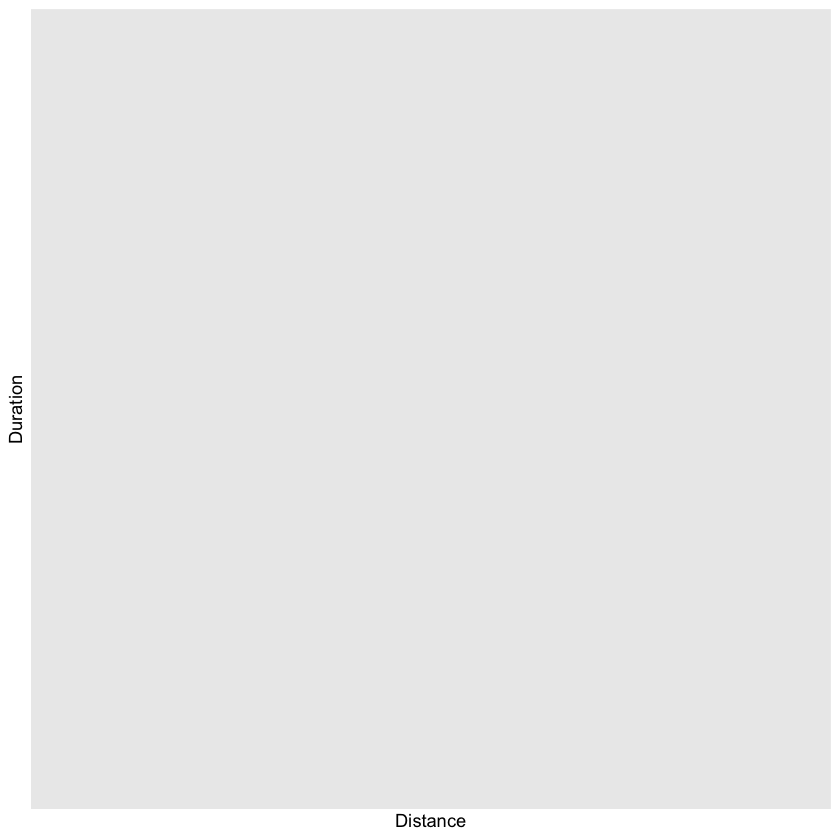

In [48]:
ggplot(data = df2, mapping = aes(x = Distance, y = Duration)) + 
    geom_point()

In [49]:
head(df2)

Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [50]:
head(df, 1)

Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<fct>


In [51]:
library(dplyr)
library(tidyverse)

In [52]:
df$minutes <- df$Duration / 60
df$minutes <- round(df$minutes, digits = 2)

In [53]:
df3 <- df[order(df$Duration),]
tail(df3, 1)

Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<fct>,<dbl>


In [54]:
#Remove erroneous data (I know I have not run anything over 170 minutes)
#df2 <- df2[df2$minutes < 185,]
df2 <- df2[df2$Avg.Spd < 10,]
df2 <- df2[df2$Cal.Burned < 2000,]
#df2 <- df[df$Date > '2019-01-01',]
df <- df[df$minutes < 185,]
df <- df[df$Avg.Spd < 10,]
df <- df[df$Cal.Burned < 2000,]
#df <- df[df$Date > '2019-01-01',]

In [55]:
nrow(df2)
nrow(df)

[1] 0

[1] 0

In [56]:
head(df, 4)

Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<fct>,<dbl>


In [57]:
head(df2, 4)

Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [58]:
#Create subsets for years 2021 and 2022
df2022 <- df[df$Date >= "2022-01-01",]
df2021 <- subset(df, Date < "2022-01-01" & Date >= "2021-01-01")

In [59]:
library(lubridate)

In [60]:
df$year <- format(df$Date, format = "%Y")
df$year <- as.integer(df$year)

In [61]:
head(df, 4)

Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<fct>,<dbl>,<int>


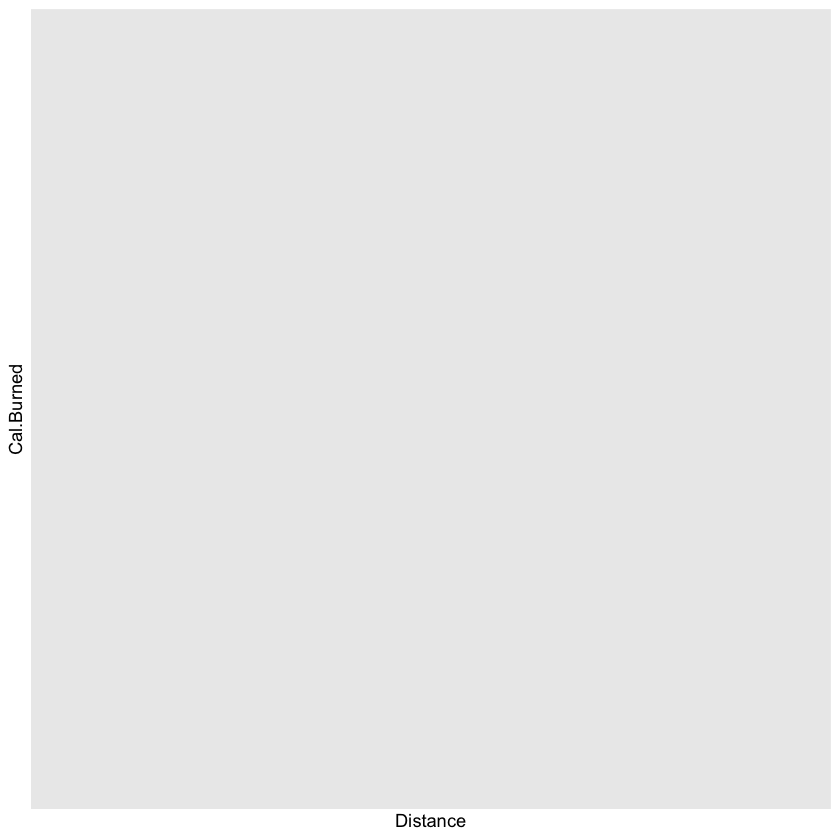

In [62]:
ggplot(data = df, mapping = aes(x = Distance, y = Cal.Burned, color = mileage)) + 
    geom_point() + geom_smooth(aes(color = year))

In [63]:
library(ggplot2)
ggplot(data=df, aes(x=Distance)) +
  geom_histogram(fill="steelblue", color="black") +
  ggtitle("Histogram of Runs") +
  facet_wrap(~year) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
  plot.background = element_rect(fill = "#a3c5ff"))

ERROR while rich displaying an object: Error in `combine_vars()`:
! Faceting variables must have at least one value

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. pas

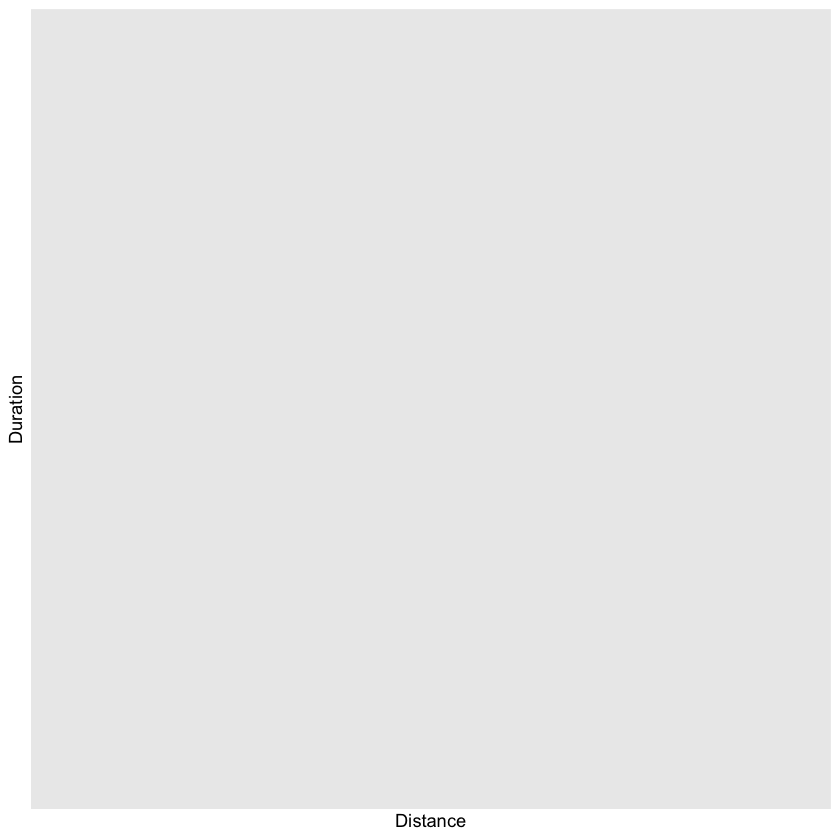

In [64]:
ggplot(data=df, aes(x=Distance, y=Duration, color=year)) + 
  geom_point()

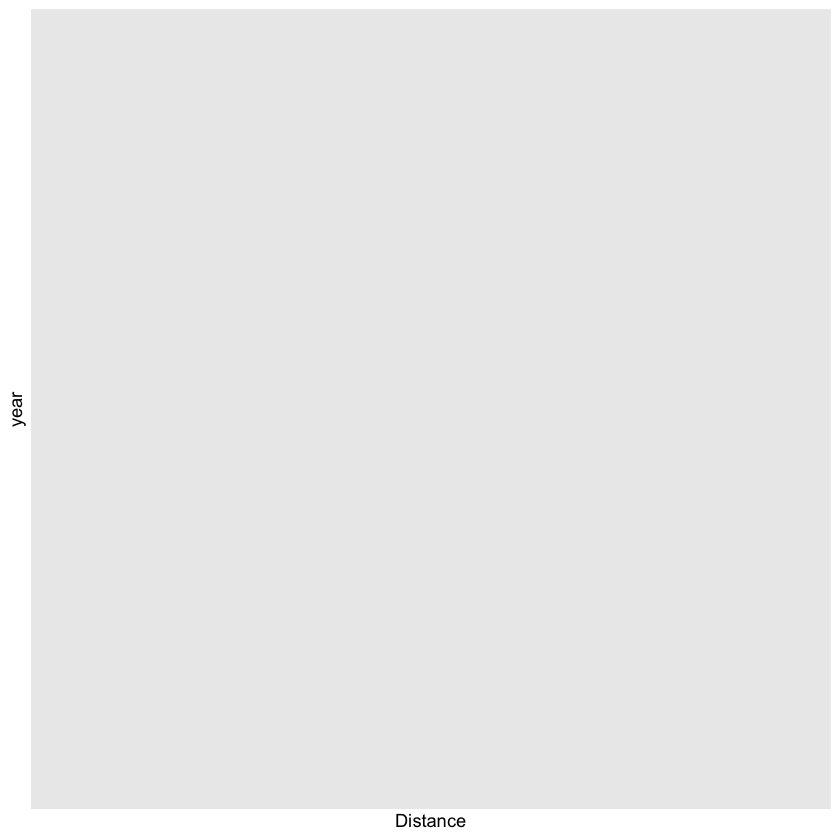

In [65]:
ggplot(data=df, aes(x=Distance, y=year)) + 
  geom_boxplot(fill="steelblue")

In [66]:
# df <- df %>% mutate(new_bin = cut(Distance, breaks=c(0, 3.09, 6.21, 13.09, 15)))


In [67]:
names(df)[names(df) == "new_bin"] <- "Miles"

In [68]:
head(df, 1)

Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<fct>,<dbl>,<int>


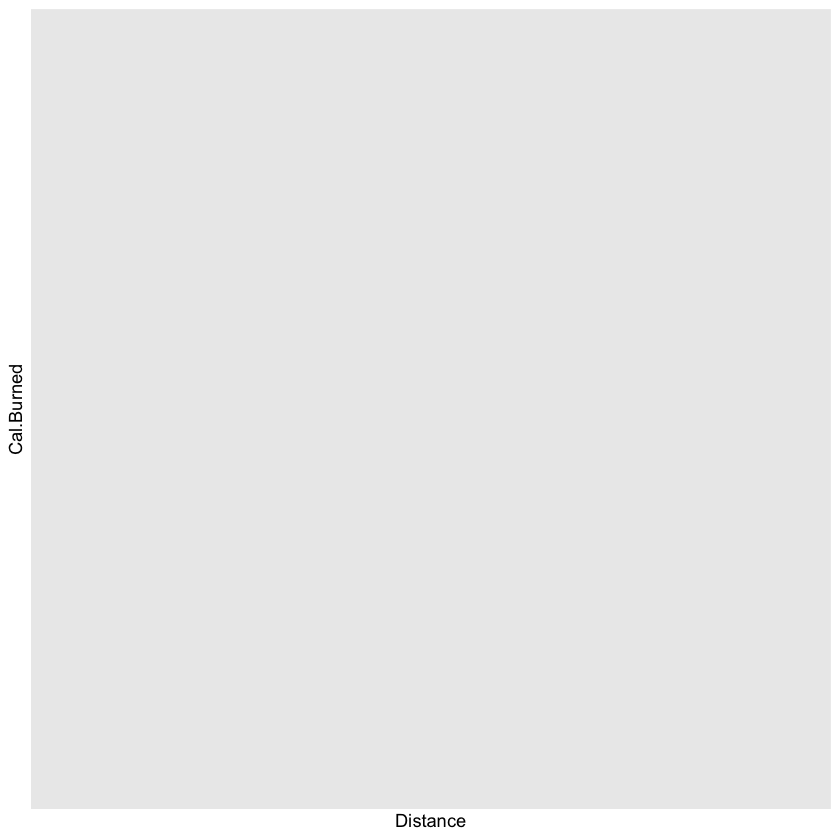

In [69]:
ggplot(data=df, aes(x=Distance, y=Cal.Burned, color=mileage)) + 
  geom_point()

In [70]:
sapply(df, function(x) sum(is.na(x)))
#sapply(df, function(x) sum(duplicated(x)))

Date   Activity   Duration   Distance   Avg.Pace   Max.Pace    Avg.Spd 
         0          0          0          0          0          0          0 
Cal.Burned     Avg.HR      Steps    mileage    minutes       year 
         0          0          0          0          0          0

In [71]:
head(df, 4)

Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<fct>,<dbl>,<int>


In [72]:
nrow(df)

[1] 0

## Update my Google Data Studio Data File

In [73]:
#install.packages("reticulate")
library(reticulate)
#use_python("C:/ProgramData/Anaconda3/python.exe")
#use_python("C:/users/coleb/mambaforge/python.exe")
#py_run_file("C:/Users/coleb/OneDrive/Coraline/MapMyRunProjects/csv to Google Sheets py script.py")

use_python("/Users/cole/miniconda/bin/python")
py_run_file("/Users/cole/Library/CloudStorage/OneDrive-Personal/Coraline/MapMyRunProjects/csv to Google Sheets py script.py")

#/Library/Frameworks/R.framework/Versions/4.2/Resources/Rscript
#/Users/cole/opt/anaconda3/python

In [ ]:
# df4 <- googlesheets4::read_sheet("https://docs.google.com/spreadsheets/d/19EApq3X76jXNkxdsE3EEF2xvjBzS7RMxeMZAhniHCds/edit?usp=sharing")

## Amazon Halo Data

In [ ]:
hdf <- read.csv("/Users/cole/Library/CloudStorage/OneDrive-Personal/Coraline/Resources/csv data/Activity_Workouts_1970-01-01--2022-09-26_6faf4d87-3a4f-448b-a4bc-2e8af30367ac.csv")

In [ ]:
head(hdf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,⋯,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Software.OS,Software.OS.Version,Active.Time..ms.,Total.Duration..ms.,Activity.Pause,Session.Source
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2022-09-25T20:05:37.302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,⋯,No Data,No Data,No Data,1.0.129673,ios,16,5853515,5853515,Not Applicable,User Logged
2,2022-09-24T19:41:00.000Z,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,⋯,No Data,No Data,No Data,1.0.129673,ios,16,2940000,2940000,Not Applicable,User Logged


In [ ]:
cadf <- within(hdf, rm('Activity.Pause', 'Session.Source', 'Software.OS.Version', 'Software.OS'))

In [ ]:
head(cadf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,2022-09-25T20:05:37.302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,158,15223,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515
2,2022-09-24T19:41:00.000Z,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,108,997,336,No Data,No Data,No Data,1.0.129673,2940000,2940000


### Test Split Date

In [ ]:
dtparts <- t(as.data.frame(str_split(cadf$Start.Time, "T")))

In [ ]:
row.names(dtparts) = NULL

In [ ]:
install.packages("chron")
library(chron)


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpEY9aLV/downloaded_packages



Attaching package: ‘chron’


The following objects are masked from ‘package:lubridate’:

    days, hours, minutes, seconds, years




In [ ]:
dates = dtparts[,1]
times = dtparts[,2]

In [ ]:
dates <- as.Date(dates)
dates <- as.data.frame(dates)


In [ ]:
names(dates)[names(dates) == "dates"] <- "Date"

In [ ]:
cadf <- as.data.frame(cadf)

In [ ]:
merge(cadf, dates)

Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.,Date
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>
2022-09-25T20:05:37.302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,158,15223,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515,2022-09-25
2022-09-24T19:41:00.000Z,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,108,997,336,No Data,No Data,No Data,1.0.129673,2940000,2940000,2022-09-25
2022-09-24T18:51:13.409Z,2022-09-24T19:40:03.623Z,WORKOUT,RUNNING,Automatic,-6,94.1595925,2763623.0,120000.0,182,160,7576,920,No Data,No Data,No Data,1.0.129673,2930214,2930214,2022-09-25
2022-09-24T17:03:37.541Z,2022-09-24T17:14:35.069Z,WORKOUT,WALKING,Automatic,-6,1.3687158333333334,No Data,60000.0,112,82,690,66,No Data,No Data,No Data,1.0.129673,657528,657528,2022-09-25
2022-09-23T22:35:44.821Z,2022-09-23T23:10:39.000Z,WORKOUT,WALKING,Automatic,-6,7.412649166666666,No Data,360000.0,113,99,2140,256,No Data,No Data,No Data,1.0.129673,2094179,2094179,2022-09-25
2022-09-23T20:00:16.880Z,2022-09-23T20:34:07.786Z,WORKOUT,RUNNING,Automatic,-6,60.1657,1680000.0,247786.0,161,138,4797,514,No Data,No Data,No Data,1.0.129673,2030906,2030906,2022-09-25
2022-09-23T13:37:43.386Z,2022-09-23T13:59:39.472Z,WORKOUT,WALKING,Automatic,-6,3.763845,No Data,180000.0,114,79,1253,119,No Data,No Data,No Data,1.0.129673,1316086,1316086,2022-09-25
2022-09-21T21:48:09.949Z,2022-09-21T22:01:07.013Z,WORKOUT,WALKING,Automatic,-6,2.45,No Data,120000.0,97,84,853,74,No Data,No Data,No Data,1.0.129673,777064,777064,2022-09-25
2022-09-21T21:20:16.529Z,2022-09-21T21:37:12.502Z,WORKOUT,WALKING,Automatic,-6,7.3862258333333335,No Data,420000.0,104,88,1113,106,No Data,No Data,No Data,1.0.129673,1015973,1015973,2022-09-25


In [ ]:
#cadf %>% separate(Start.Time, c(Date, Time), "T")

### Better date split option

In [ ]:
library(dplyr)
library(tidyr)
cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [ ]:
head(cadf, 2)

,Date,Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,2022-09-25,20:05:37.302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,158,15223,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515
2,2022-09-24,19:41:00.000Z,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,108,997,336,No Data,No Data,No Data,1.0.129673,2940000,2940000


In [ ]:
cadf <- cadf %>% mutate(Date = as.Date(Date))

In [ ]:
# mymerge <- merge(cadf, df, by = c("Date"))

In [ ]:
library(stringr)
library(tidyr)
cadf <- separate(cadf, Time, c('Times', 'Ms'), "[.]")

In [ ]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,⋯,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,2022-09-25,20:05:37,302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,⋯,173,158,15223,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515


In [ ]:
cadf$DTS <- with(cadf, ymd(Date) + hms(Times))

In [ ]:
library("lubridate")
hours <- -3600 * cadf$Local.Time.Zone.Offset
cadf$my_date_time1 <- cadf$DTS + (-3600 * cadf$Local.Time.Zone.Offset)

In [ ]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,⋯,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,my_date_time1
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>
1,2022-09-25,20:05:37,302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,⋯,15223,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515,2022-09-25 20:05:37,2022-09-26 02:05:37


In [ ]:
cadf <- separate(cadf, my_date_time1, c('Date 2', 'Time 2'), " ")

In [ ]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,⋯,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2,Time 2
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>
1,2022-09-25,20:05:37,302Z,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,⋯,1818,No Data,No Data,No Data,1.0.129673,5853515,5853515,2022-09-25 20:05:37,2022-09-26,02:05:37


In [ ]:
cadf <- within(cadf, rm('Date', 'Time 2', 'Software.Version', 'Ms'))

In [ ]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>
1,20:05:37,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,158,15223,1818,No Data,No Data,No Data,5853515,5853515,2022-09-25 20:05:37,2022-09-26
2,19:41:00,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,108,997,336,No Data,No Data,No Data,2940000,2940000,2022-09-24 19:41:00,2022-09-25


In [ ]:
names(cadf)[17] <- 'Date'

In [ ]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Pace..m.s.,Distance..m.,Elevation..m.,Date,Total.Duration..ms.,DTS,Date 2
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>
1,20:05:37,2022-09-25T21:43:10.817Z,WORKOUT,RUNNING,Automatic,-6,194.73886666666667,5830817.0,22698.0,173,158,15223,1818,No Data,No Data,No Data,5853515,5853515,2022-09-25 20:05:37,2022-09-26
2,19:41:00,2022-09-24T20:30:00.000Z,WORKOUT,OTHER,Automatic,-6,47.2,180000.0,2460000.0,146,108,997,336,No Data,No Data,No Data,2940000,2940000,2022-09-24 19:41:00,2022-09-25


In [ ]:
library(lubridate)
#df$Date <- as.Date(df$Date)
cadf <- data.frame(cadf)
cadf$Date <- as.Date(cadf$Date2)

ERROR: Error in `$<-.data.frame`(`*tmp*`, Date, value = structure(numeric(0), class = "Date")): replacement has 0 rows, data has 421


In [ ]:
head(df, 2)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,2022-10-10,Run,8937,13.10,11.37,0.26,5.28,1867,146,22295,HalfMar,148.95,2022
2,2022-10-02,Run,6544,10.49,10.40,0.15,5.77,1257,143,17144,TenM,109.07,2022


In [ ]:
cadf2 <- filter(cadf, Session.Subtype == 'RUNNING')

In [ ]:
mymerge <-merge(x=cadf2,y=df,by='Date')

In [ ]:
length(mymerge)
length(cadf2)
length(df)
nrow(mymerge)
nrow(cadf2)
nrow(df)

[1] 32

[1] 20

[1] 13

[1] 0

[1] 184

[1] 738

In [ ]:
mymerge <- mymerge[order(mymerge$Date),]

In [ ]:
mymerge$year <- format(mymerge$Date, format = "%Y")

In [ ]:
head(mymerge, 2)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,⋯,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps.y,mileage,minutes,year
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>


## EDA with my merged data set

In [ ]:
mm22 <- mymerge %>% select(c("Distance", "Duration", "Activity.Score", "Steps.y", "Avg.HR", "Avg.Spd", "Cal.Burned"))

In [ ]:
mm22 <- transform(mm22,
                             Activity.Score = as.numeric(Activity.Score))

In [ ]:
mm22 <- mm22 %>%

  filter(!duplicated(cbind(Distance,  Duration, Cal.Burned)))

In [ ]:
head(mm22, 20)

,Distance,Duration,Activity.Score,Steps.y,Avg.HR,Avg.Spd,Cal.Burned
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.56,2143,76.51169,5720,146,5.98,469
2,3.56,2015,76.28970,5340,161,6.36,494
3,4.00,2164,72.41923,5790,148,6.65,521
4,4.00,2135,72.90169,5720,148,6.74,520
5,3.57,2012,72.83316,5405,150,6.38,457
6,4.40,2573,94.71112,6816,153,6.16,603
7,3.10,1581,57.62157,4257,148,7.06,402
8,3.10,1557,55.09420,4200,148,7.17,400
9,3.10,1800,57.93465,4796,148,6.21,403


## Plot EDA

In [ ]:
df2 = df[sapply(df, is.numeric)]

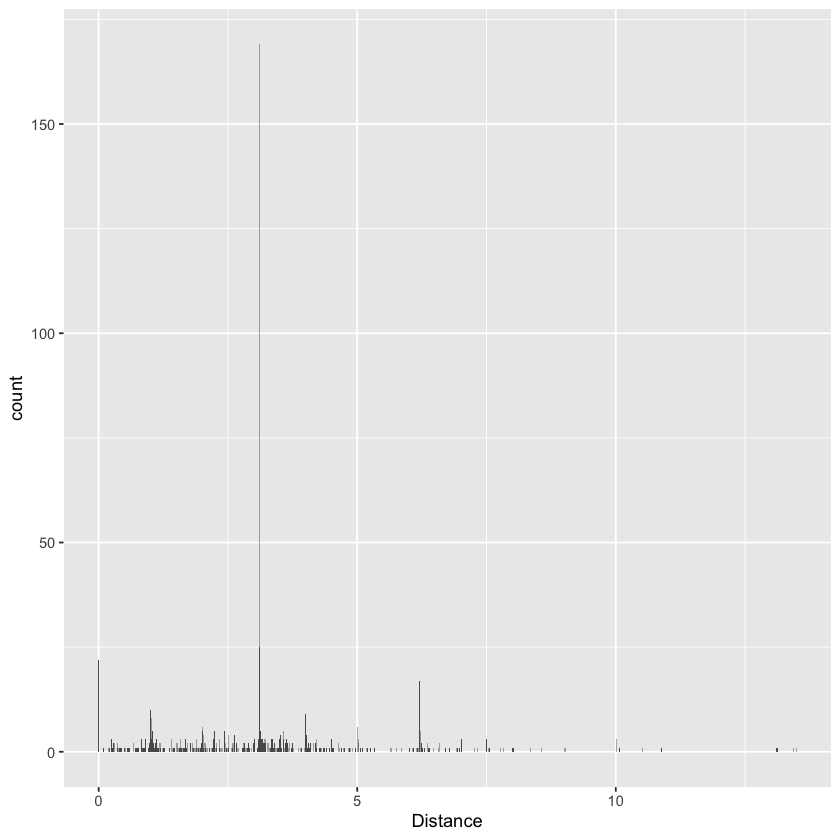

In [ ]:
ggplot(data = df2) +
  geom_bar(mapping = aes(x = Distance))

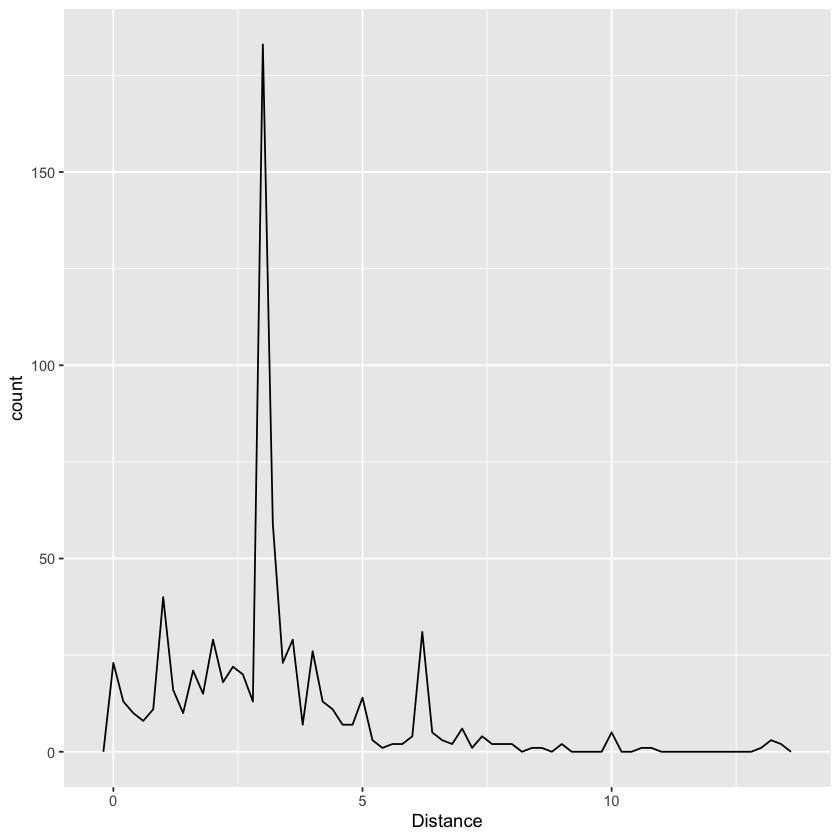

In [ ]:
ggplot(data = df2, mapping = aes(x = Distance, colour = Duration)) +
  geom_freqpoly(binwidth = 0.2)

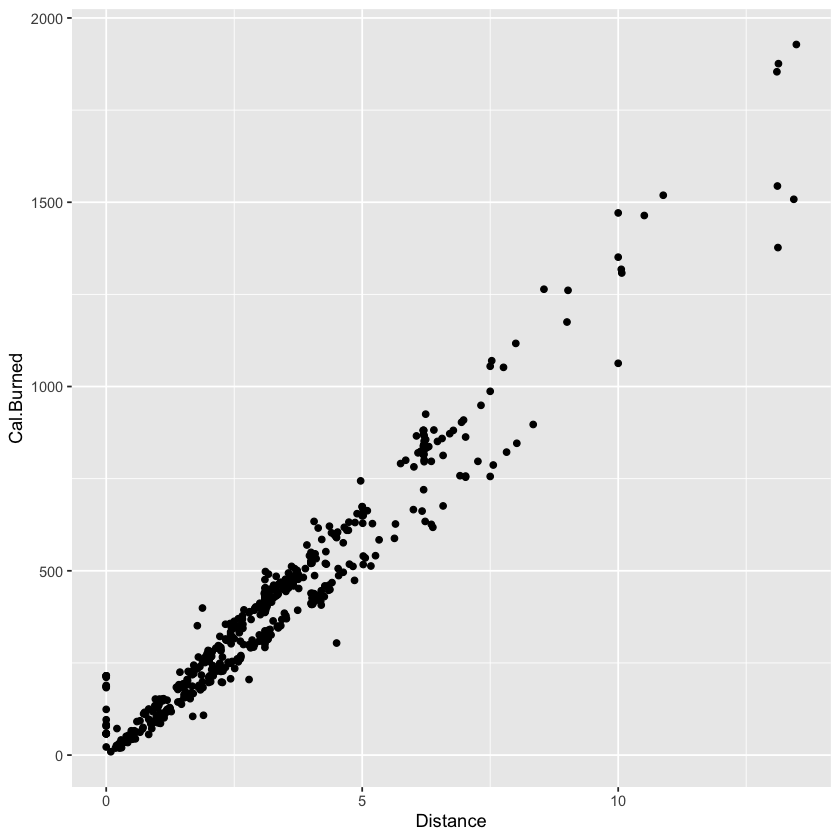

In [ ]:
ggplot(data = df2, mapping = aes(x = Distance, y = Cal.Burned)) + 
  geom_point()

In [ ]:
cormat <- round(cor(df2),2)
head(cormat)


,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,minutes,year
Duration,1.00,0.88,0.09,-0.03,-0.04,0.87,0.01,0.91,1.00,0.23
Distance,0.88,1.00,-0.16,-0.09,0.36,0.97,0.21,0.94,0.88,0.36
Avg.Pace,0.09,-0.16,1.00,0.09,-0.43,-0.18,-0.33,-0.15,0.09,-0.09
Max.Pace,-0.03,-0.09,0.09,1.00,-0.14,-0.10,-0.06,-0.08,-0.03,-0.07
Avg.Spd,-0.04,0.36,-0.43,-0.14,1.00,0.32,0.42,0.12,-0.04,0.33
Cal.Burned,0.87,0.97,-0.18,-0.10,0.32,1.00,0.23,0.93,0.87,0.39


In [ ]:
install.packages("reshape2")
library(reshape2)
melted_cormat <- melt(cormat)
head(melted_cormat)


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpWdRzPn/downloaded_packages


,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Duration,Duration,1.00
2,Distance,Duration,0.88
3,Avg.Pace,Duration,0.09
4,Max.Pace,Duration,-0.03
5,Avg.Spd,Duration,-0.04
6,Cal.Burned,Duration,0.87


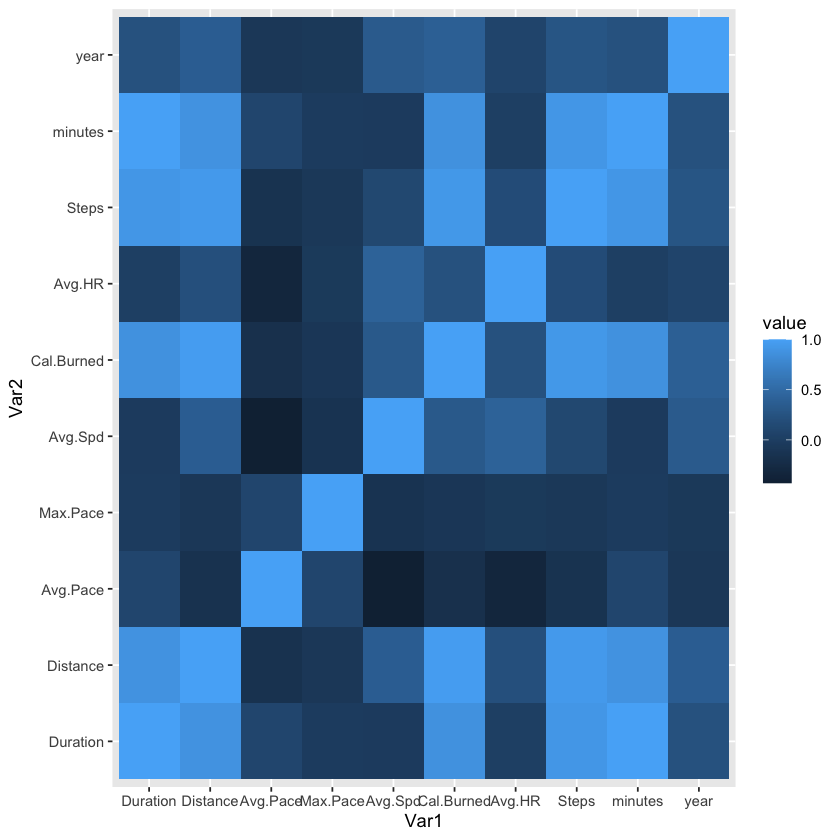

In [ ]:
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()

In [ ]:
linear_model <- lm(minutes ~ Distance, data = df2)

In [ ]:
summary(linear_model)


Call:
lm(formula = minutes ~ Distance, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.711  -5.591  -3.692   1.716  59.727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0319     0.7170   7.018 5.13e-12 ***
Distance      9.3824     0.1905  49.245  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.38 on 733 degrees of freedom
Multiple R-squared:  0.7679,	Adjusted R-squared:  0.7676 
F-statistic:  2425 on 1 and 733 DF,  p-value: < 2.2e-16


In [ ]:
#Calories burned during a run (15 miles = 1, 20 miles = 2, etc.)

new_distance <- data.frame(
    Distance = c(15, 20, 26.2)   
)

pred <- predict(linear_model, new_distance, interval = "confidence")
pred

,fit,lwr,upr
1,145.7686,141.2848,150.2525
2,192.6808,186.3455,199.0162
3,250.8520,242.2096,259.4945


In [ ]:
halftimes <- df2[df2$Distance > 13.09,]
#halftimes2 <- mm23[mm23$Distance > 13.09,]


In [ ]:
head(halftimes, 20)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,minutes,year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
19,11065,13.11,14.07,7.71,4.27,1544,140,22531,184.42,2022
116,9189,13.10,11.69,0.68,5.13,1854,156,22087,153.15,2022
169,9540,13.13,12.11,1.35,4.96,1876,148,22488,159.00,2021
286,10191,13.48,12.60,0.48,4.76,1928,144,22719,169.85,2021
440,8767,13.43,10.87,0.13,5.52,1508,145,23604,146.12,2020
486,7844,13.12,9.96,1.10,6.02,1377,150,21427,130.73,2020


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



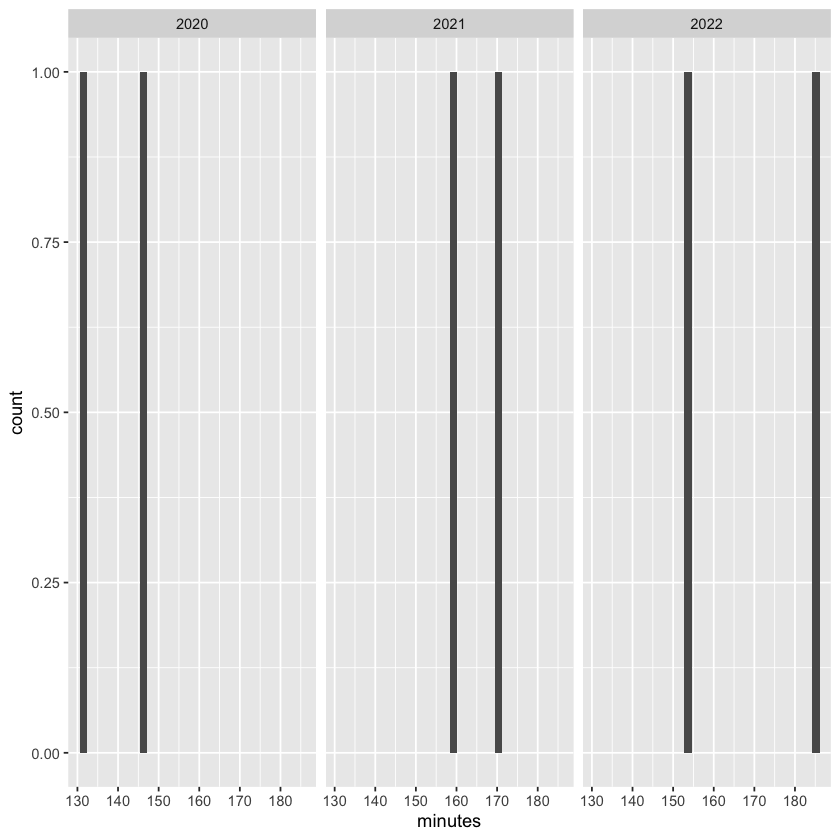

In [ ]:
ggplot(halftimes, aes(x=minutes)) + 
  geom_histogram() + 
  facet_wrap(~year)

In [ ]:
df3 <- df2 %>%

  filter(!duplicated(cbind(Distance,  Duration, Cal.Burned)))

In [ ]:
head(df3, 20)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,minutes,year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5803,9.02,10.72,0.82,5.60,1261,159,15198,96.72,2022
2,2799,4.65,10.03,1.17,5.98,618,162,7380,46.65,2022
3,1775,3.10,9.54,0.00,6.29,412,148,4721,29.58,2022
4,1779,3.10,9.56,10.57,6.27,413,138,4212,29.65,2022
5,1892,3.11,10.14,0.45,5.91,415,159,4970,31.53,2022
6,2273,3.66,10.35,0.47,5.80,459,146,6002,37.88,2022
7,2844,4.90,9.67,0.00,6.20,655,148,7554,47.40,2022
8,3964,5.01,13.18,0.40,4.55,629,125,8485,66.07,2022
9,2584,3.75,11.49,1.28,5.22,491,143,6236,43.07,2022


In [ ]:
linear_model$coefficients

(Intercept)    Distance 
   5.031934    9.382446

In [ ]:
mlr <- lm(Distance ~ minutes + Avg.Spd, data = df2)

In [ ]:
summary(mlr)


Call:
lm(formula = Distance ~ minutes + Avg.Spd, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2259 -0.1438 -0.0142  0.1802  2.2414 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.4079674  0.0782070  -30.79   <2e-16 ***
minutes      0.0832903  0.0009316   89.41   <2e-16 ***
Avg.Spd      0.4867500  0.0121514   40.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5429 on 732 degrees of freedom
Multiple R-squared:  0.9273,	Adjusted R-squared:  0.9271 
F-statistic:  4667 on 2 and 732 DF,  p-value: < 2.2e-16


In [ ]:
mlr$coefficients

(Intercept)     minutes     Avg.Spd 
-2.40796741  0.08329034  0.48675005

In [ ]:
install.packages('mgcv')
library(mgcv)


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpWdRzPn/downloaded_packages


`geom_smooth()` using formula 'y ~ x'



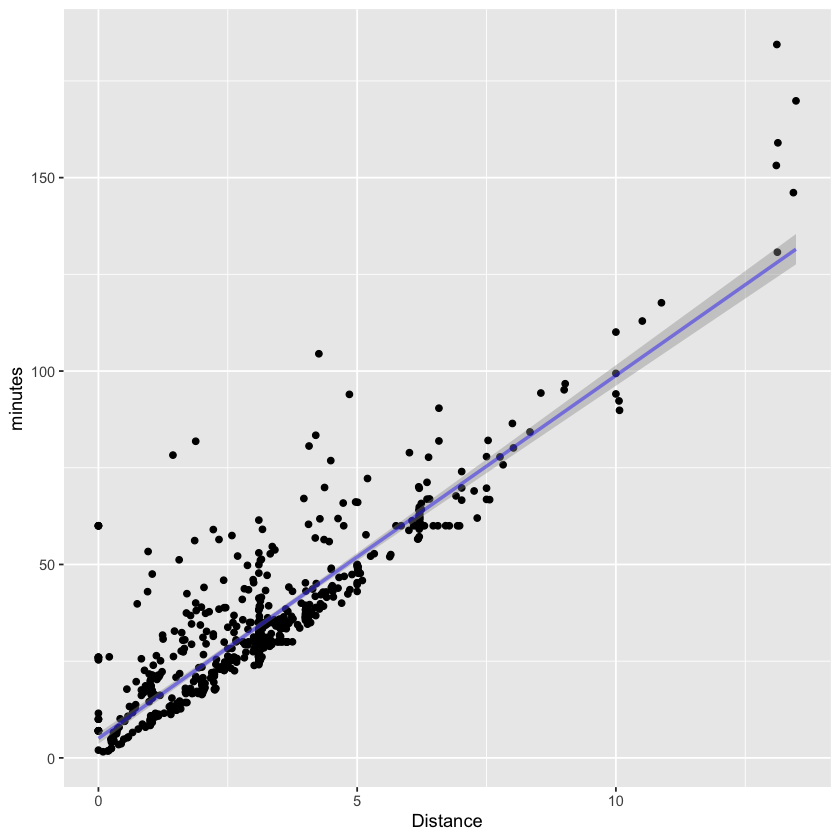

In [ ]:
ggplot(df2, aes(x = Distance, y = minutes)) +
  geom_point() + 
  stat_smooth(method = "lm", col = "#1900fa6e")

In [ ]:
# score_model <- lm(duration ~ Distance, data = mm22)
# mm22$predicted_duration <- predict(score_model, mm22$Distance, interval = "confidence")

# ggplot(mm22, aes(x = duration, y = Distance)) +
#   geom_smooth(method = "lm", se = FALSE, color = "red") +  # Plot regression slope
#   geom_segment(aes(xend = duration, yend = predicted_duration), alpha = .2) +  # alpha to fade lines
#   geom_point() +
#   geom_point(aes(y = predicted_duration), shape = 1) +
#   theme_bw()  # Add theme for cleaner look

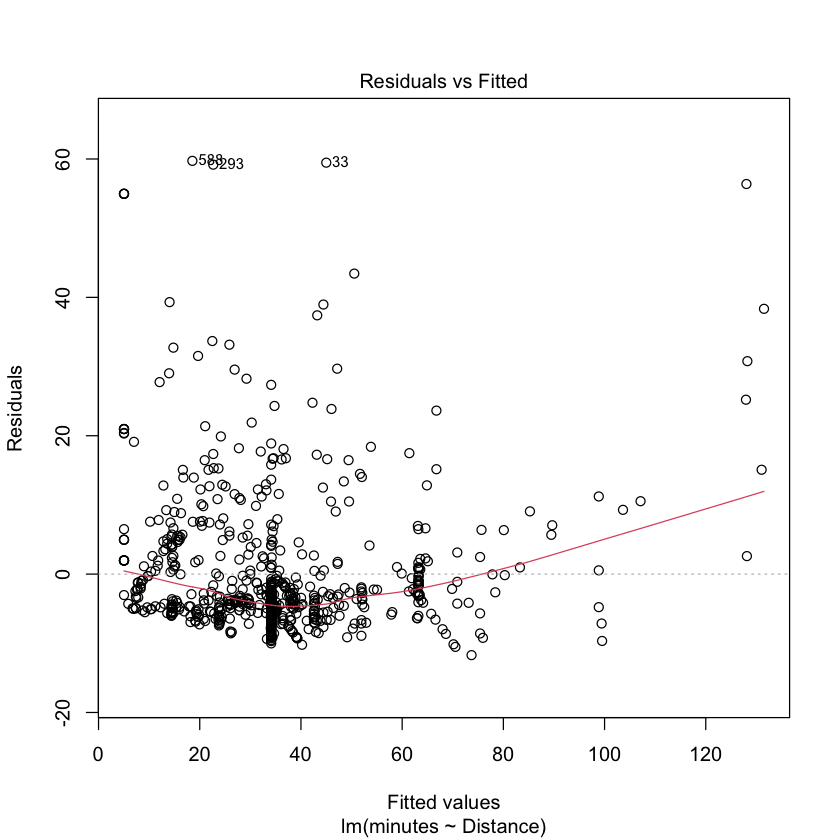

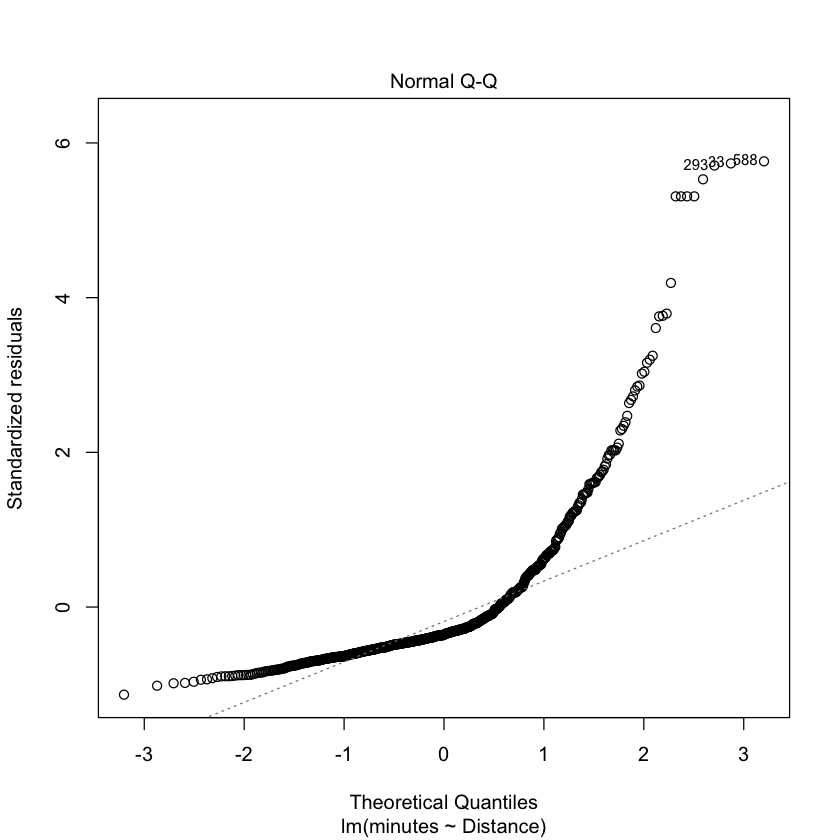

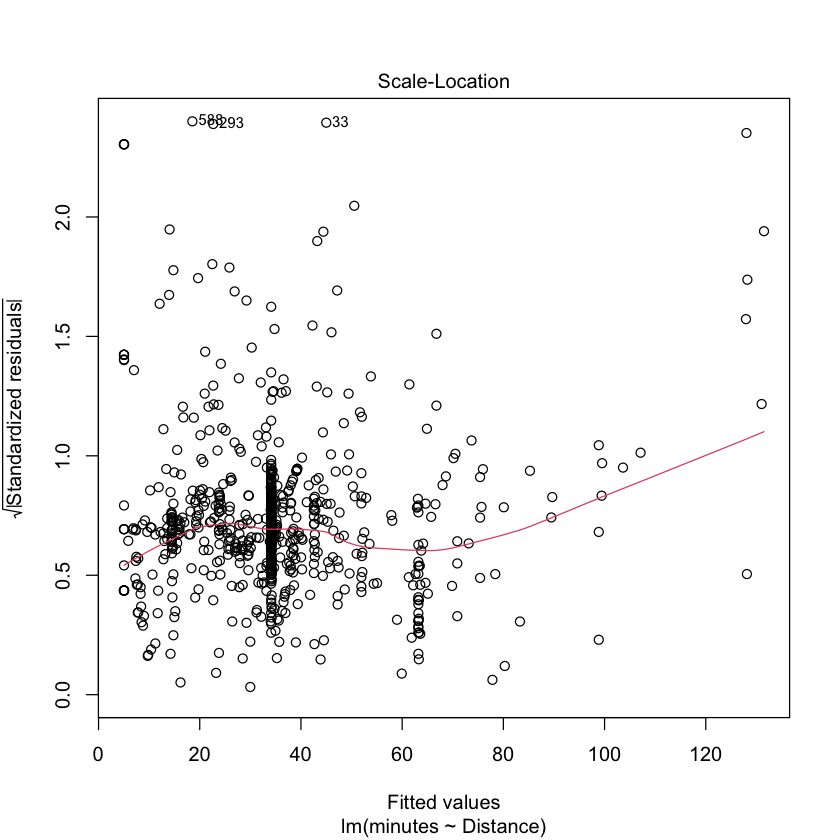

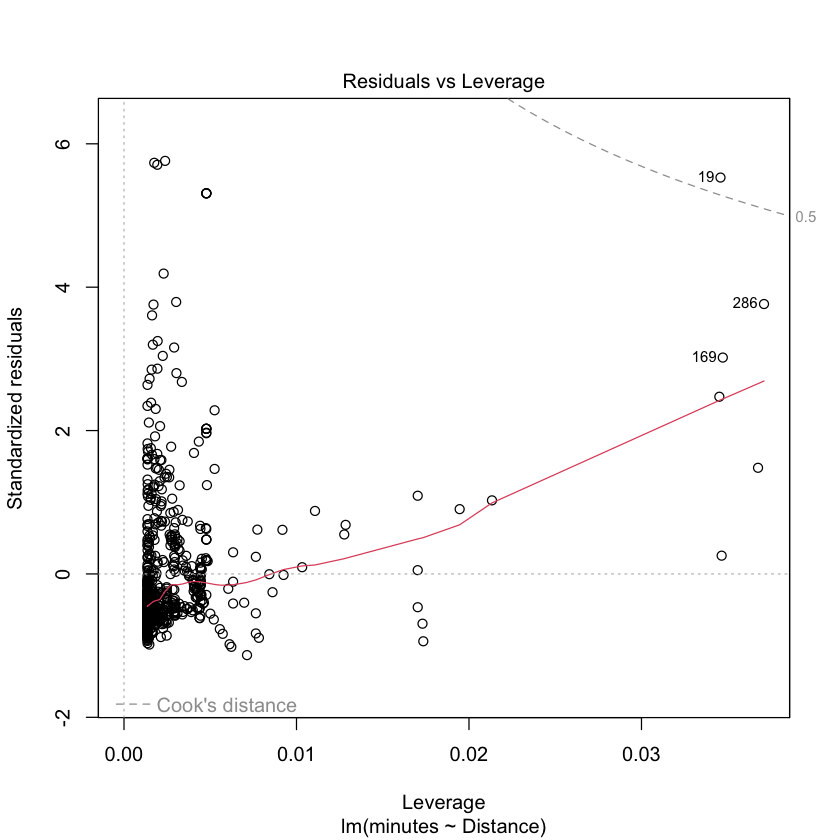

In [ ]:
linear_model <- lm(minutes ~ Distance, data = df2)
plot(linear_model)

## Extra

In [ ]:
set.seed(20)
x <- seq(from=0, to=20, by=0.1)

# value to predict (y):
y <- 500 + 0.4 * (x-10)^3

# some noise is generated and added to the real signal (y):
noise <- rnorm(length(x), mean=10, sd=80)
noisy.y <- y + noise

`geom_smooth()` using formula 'y ~ x'



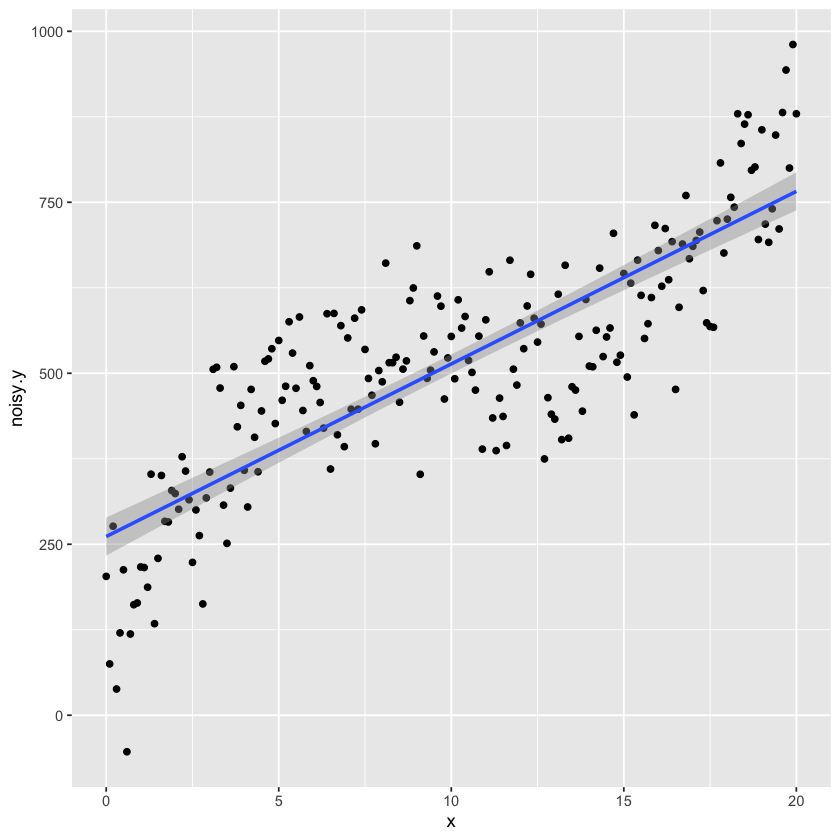

In [ ]:
# fit linear model
ggplot(data=NULL,aes(x, noisy.y)) + 
    geom_point() + 
    geom_smooth(method = "lm")

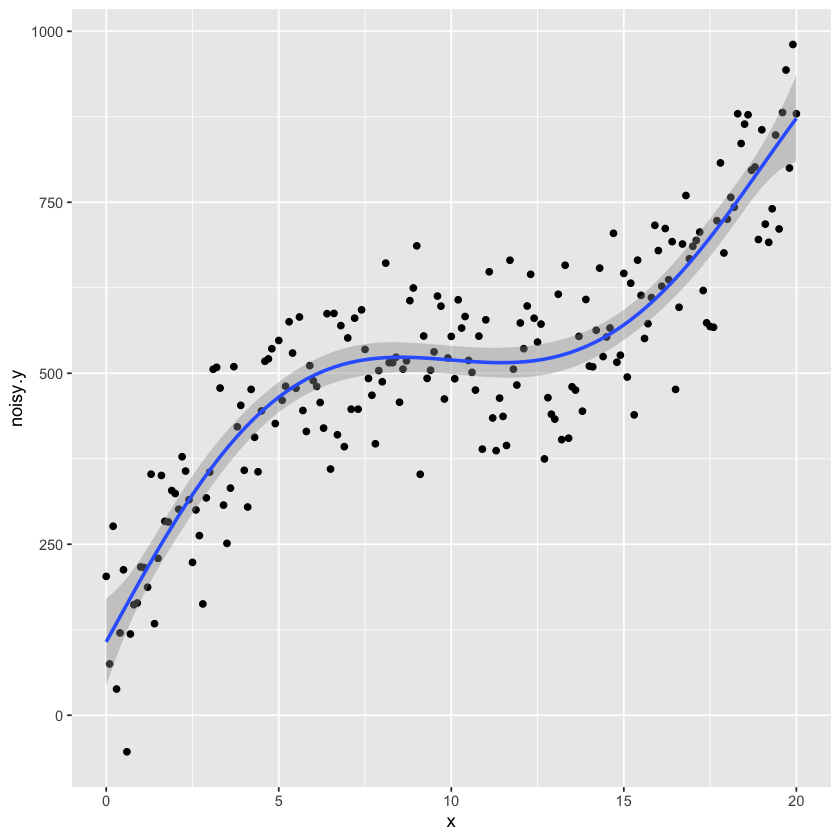

In [ ]:
ggplot(data=NULL,aes(x, noisy.y)) + 
    geom_point() + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 5))

## Linear Model & Multiple Linear Model

In [ ]:
linear_model <- lm(Duration ~ Distance, df2)

In [ ]:
mse <- mean(linear_model$residuals^2)
mse

[1] 386669.1

In [ ]:
rmse <- sqrt(mse)
rmse

[1] 621.8272

In [ ]:
summary(linear_model)$r.squared

[1] 0.7679027

In [ ]:
head(df2, 2)

,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,minutes,year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5803,9.02,10.72,0.82,5.60,1261,159,15198,96.72,2022
2,2799,4.65,10.03,1.17,5.98,618,162,7380,46.65,2022


In [ ]:
mlr <- lm(Distance ~ minutes + Cal.Burned, data = df2)

In [ ]:
mse_mlr <- mean(mlr$residuals^2)
mse_mlr

[1] 0.199268

In [ ]:
rmse_mlr <- sqrt(mse_mlr)
rmse_mlr

[1] 0.4463945

In [ ]:
summary(mlr)$r.squared

[1] 0.9506376

In [ ]:
# head(predict(score_model))

In [ ]:
#install.packages("rlang")
#install.packages("tidymodels")
#install.packages('devtools')
#install.packages('Rtools')
#devtools::install_github("r-lib/rlang", build_vignettes = TRUE)

In [ ]:
# # Library for modeling
# library(tidymodels)

# # Load tidyverse
# library(tidyverse)

In [ ]:
head(mymerge)

,Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,⋯,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps.y,mileage,minutes,year
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
1,2021-09-23,12:18:41,2021-09-23T12:59:29.798Z,WORKOUT,RUNNING,Automatic,-5,76.51169,2160000.0,269798.0,⋯,3.56,10.04,2.40,5.98,469,146,5720,FiveK,35.72,2021
2,2021-09-24,12:30:07,2021-09-24T13:13:14.739Z,WORKOUT,RUNNING,Automatic,-5,76.28969833333333,2040000.0,494739.0,⋯,3.56,9.44,4.25,6.36,494,161,5340,FiveK,33.58,2021
3,2021-09-25,16:42:43,2021-09-25T17:20:33.052Z,WORKOUT,RUNNING,Automatic,-5,72.41923333333332,2133052.0,76050.0,⋯,4.00,9.02,0.00,6.65,521,148,5790,FiveK,36.07,2021
4,2021-09-26,15:24:57,2021-09-26T16:03:50.992Z,WORKOUT,RUNNING,Automatic,-5,72.90168750000001,2100000.0,170992.0,⋯,4.00,8.90,0.00,6.74,520,148,5720,FiveK,35.58,2021
5,2021-09-27,12:19:08,2021-09-27T12:58:47.413Z,WORKOUT,RUNNING,Automatic,-5,72.83315583333334,2040000.0,287413.0,⋯,3.57,9.40,0.96,6.38,457,150,5405,FiveK,33.53,2021
6,2021-09-28,10:05:11,2021-09-28T10:56:40.224Z,WORKOUT,RUNNING,Automatic,-5,94.7111225,2640000.0,400224.0,⋯,4.40,9.74,0.90,6.16,603,153,6816,FiveK,42.88,2021


In [ ]:
smmg <- mymerge %>% select(c(Distance, Duration, Activity.Score, Avg.HR, Steps.y))

In [ ]:
head(smmg)

,Distance,Duration,Activity.Score,Avg.HR,Steps.y
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,3.56,2143,76.51169,146,5720
2,3.56,2015,76.28969833333333,161,5340
3,4.00,2164,72.41923333333332,148,5790
4,4.00,2135,72.90168750000001,148,5720
5,3.57,2012,72.83315583333334,150,5405
6,4.40,2573,94.7111225,153,6816


In [ ]:
# set.seed(1234)
# flight_split <- initial_split(smmg)
# train_data <- training(flight_split)
# test_data <- testing(flight_split)

In [ ]:
# library(tidyverse)
# # Pick linear regression
# lm_spec <- linear_reg() %>%
#   # Set engine
#   set_engine(engine = "lm")

# # Print the linear function
# lm_spec

## Extra

In [ ]:
# test <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [ ]:
# library(dplyr)
# library(tidyr)
# cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [ ]:
# cadf <- cadf %>% mutate(Date = as.Date(Date))

In [ ]:
# names(test)[names(test) == "Workout.Date"] <- "Date"


In [ ]:
# test$Workout.Date <- as.Date(test$Workout.Date, format = "%B %e, %Y")

In [ ]:
# mmerge2 <- merge(test, df, by = "Date", all.x=TRUE)

In [ ]:
# head(mmerge2, 2)
# mmerge2 <- as.data.frame(mmerge2)

In [ ]:
# mmerge2 <- mmerge2[order(mmerge2$Date, decreasing = TRUE),]

In [ ]:
# mmerge2

In [ ]:
# library(tidyr)
# testdf2 <- mmerge2 %>% drop_na()

In [ ]:
# testdf2

In [ ]:
# library(tidyr)
# test <- separate(test, Time, c('Times', 'Ms'), "[.]")

In [ ]:
# library("lubridate")
# hours <- -3600 * mymerge$Local.Time.Zone.Offset
# mymerge$my_date_time1 <- mymerge$DTS + (-3600 * mymerge$Local.Time.Zone.Offset)

### Prep to upload to SQL database

In [ ]:
#head(mymerge)
df2 <- df[order(df$Date, decreasing = TRUE),]
head(df2)

,Date,Activity,Duration,Distance,Avg.Pace,Max.Pace,Avg.Spd,Cal.Burned,Avg.HR,Steps,mileage,minutes,year
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
6,2022-11-20,Run,2273,3.66,10.35,0.47,5.80,459,146,6002,FiveK,37.88,2022
1,2022-09-25,Run,5803,9.02,10.72,0.82,5.60,1261,159,15198,TenK,96.72,2022
2,2022-09-24,Run,2799,4.65,10.03,1.17,5.98,618,162,7380,FiveK,46.65,2022
3,2022-09-23,Run,1775,3.10,9.54,0.00,6.29,412,148,4721,FiveK,29.58,2022
4,2022-09-18,Indoor Run / Jog,1779,3.10,9.56,10.57,6.27,413,138,4212,FiveK,29.65,2022
5,2022-09-17,Run,1892,3.11,10.14,0.45,5.91,415,159,4970,FiveK,31.53,2022


In [ ]:
df3 <- df %>% select(c(Date, Distance, Duration, Activity, Avg.HR, Steps, Cal.Burned)) 


In [ ]:
library(tidyverse)
df4 <- df3 %>% filter(!duplicated(cbind(df3$Date, df3$duration)))
df5 <- df4 [order(df4$Date, decreasing = TRUE), ]

In [ ]:
# df5 <- df5 %>% rename(Date = "Date", Distance = "Distance", duration = "duration", Activity_Score = "Activity.Score", AvgHR = "Avg.HR", Stepsy = "Steps.y", CalBurned = "Cal.Burned")

In [ ]:
head(df5)

,Date,Distance,Duration,Activity,Avg.HR,Steps,Cal.Burned
,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
6,2022-11-20,3.66,2273,Run,146,6002,459
1,2022-09-25,9.02,5803,Run,159,15198,1261
2,2022-09-24,4.65,2799,Run,162,7380,618
3,2022-09-23,3.10,1775,Run,148,4721,412
4,2022-09-18,3.10,1779,Indoor Run / Jog,138,4212,413
5,2022-09-17,3.11,1892,Run,159,4970,415


In [ ]:
# #write.csv(df5, "C:/Users/coleb/OneDrive/Cosmo/user94403143_workout_history_df3.csv", row.names = FALSE)

# write.csv(df5, '//Users//colehamilton//Library//CloudStorage//OneDrive-Personal//Coraline//MapMyRunProjects//df5.csv', row.names = FALSE, append = TRUE)

In [ ]:
install.packages("odbc")
install.packages("RODBC")


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpWdRzPn/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpWdRzPn/downloaded_packages


In [ ]:
# Define boundaries for SQL query
library(odbc)
library(RODBC)
library(dbplyr)
library(data.table)
library(dplyr)
# library(openxlsx)

In [ ]:
lema_UN <- readLines("/Users/cole/Library/CloudStorage/OneDrive-Personal/Cosmo/Db2.txt")[1]
lema_pw <- readLines("/Users/cole/Library/CloudStorage/OneDrive-Personal/Cosmo/Db2.txt")[2]
lema_server <- readLines("/Users/cole/Library/CloudStorage/OneDrive-Personal/Cosmo/Db2.txt")[3]
lema <- odbcConnect(lema_server, uid = lema_UN, pwd = lema_pw)


# Load necesary libraries
# library(RODBC)
# library(dplyr)
# library(data.table)
# library(openxlsx)

# Define boundaries for the SQL queries
Prev_FY <- Prod_FY-1

# SQL for MAP Ach and Req
Req_query <- paste0("SELECT
                      * from MAPMYRUNS")

lema <- odbcConnect(lema_server, uid = lema_UN, pwd = lema_pw)
MAP_Req <- as.data.table(sqlQuery(lema, Req_query))

# Housekeeping
rm(Req_query, Ach_query)

Warning message in file(con, "r"):
“cannot open file '/Users/cole/Library/CloudStorage/OneDrive-Personal/Cosmo/Db2.txt': No such file or directory”


ERROR: Error in file(con, "r"): cannot open the connection
